In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [63]:
import numpy as np

import torch
import random
import math
import json

from tqdm import tqdm_notebook
from boltons.iterutils import pairwise
from scipy.stats import kendalltau
from itertools import permutations

from sent_order.models.kt_regression import SentenceEncoder, Regressor, Corpus
from sent_order.perms import sample_uniform_perms

In [4]:
sent_encoder = torch.load(
    '../../data/models/new/kt-reg/sent_encoder.366.bin',
    map_location={'cuda:0': 'cpu'},
)

In [5]:
regressor = torch.load(
    '../../data/models/new/kt-reg/regressor.366.bin',
    map_location={'cuda:0': 'cpu'},
)

/Users/dclure/Projects/plot-ordering/env/lib/python3.6/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'sent_order.models.kt_regression.Regressor' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [6]:
train = Corpus('../../data/dev.json/', 10000)

100%|██████████| 10000/10000 [00:01<00:00, 6913.28it/s]


In [268]:
grafs = [g for g in train.grafs if len(g.sentences) == 7]

In [269]:
len(grafs)

948

In [342]:
graf = random.choice(grafs)

In [343]:
[' '.join(s.tokens) for s in graf.sentences]

['The dynamical behaviour of a transcendental entire function in any periodic component of the Fatou set is well understood .',
 'Here we study the dynamical behaviour of a transcendental entire function $ f$ in any multiply connected wandering domain $ U$ of $ f$.',
 'By introducing a certain positive harmonic function $ h$ in $ U$ , related to harmonic measure , we are able to give the first detailed description of this dynamical behaviour .',
 'Using this new technique , we show that , for sufficiently large $ n$ , the image domains $ U_n = f^n(U)$ contain large annuli , $ C_n$ , and that the union of these annuli acts as an absorbing set for the iterates of $ f$ in $ U$.',
 "Moreover , $ f$ behaves like a monomial within each of these annuli and the orbits of points in $ U$ settle in the long term at particular ` levels ' within the annuli , determined by the function $ h$.",
 'We also discuss the proximity of $ \\partial U_n$ and $ \\partial C_n$ for large $ n$ , and the connectiv

In [344]:
sents = sent_encoder(graf.sentence_variables())

In [345]:
sents

Variable containing:
 4.0133e-03  8.7286e-05 -6.0859e-03  ...   9.9282e-04 -2.1285e-05 -5.7891e-07
 1.0262e-03  1.8907e-03  1.6612e-02  ...  -1.5298e-03 -1.6407e-05  3.0181e-03
 1.3134e-07  9.7260e-08 -1.6203e-05  ...  -2.6820e-02 -1.0207e-07 -1.6604e-02
                ...                   ⋱                   ...                
-1.4916e-03  1.5696e-06 -2.0604e-03  ...   1.2146e-01  1.7109e-06  7.5679e-03
-2.7891e-03 -4.9844e-03 -1.8737e-02  ...   5.8598e-08 -3.2260e-07  7.3680e-02
-1.6545e-01  5.5504e-02 -1.1032e-02  ...  -1.4838e-01  7.5947e-05 -2.9423e-03
[torch.FloatTensor of size 7x1000]

In [346]:
perms = list(permutations(range(7)))

In [347]:
x = []
kts = []
for perm in tqdm_notebook(perms):
    
    sort = torch.LongTensor(perm)
    x.append(sents[sort])
    
    kt = kendalltau(perm, range(7)).correlation
    kts.append(kt)

HBox(children=(IntProgress(value=0, max=5040), HTML(value='')))

In [348]:
x = torch.stack(x)
y = regressor(x)

In [349]:
y = (1-y)*2-1

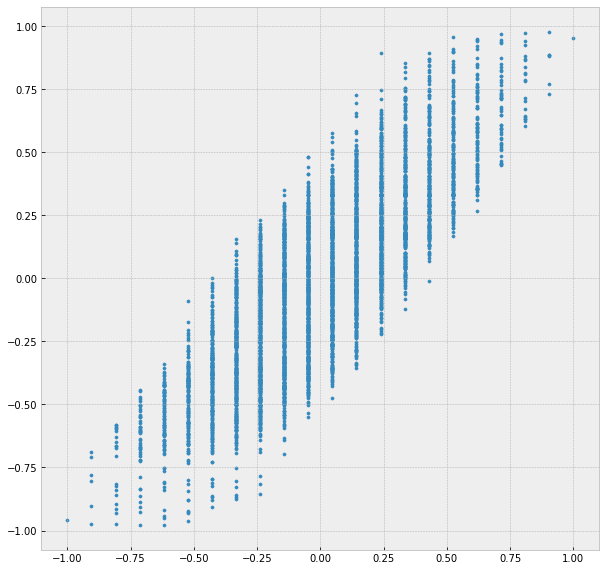

In [350]:
plt.figure(figsize=(10,10))
plt.scatter(kts, y.data.tolist(), s=10)